#### Prepare a logistic regression model and an Artificial Neural Network to classify features from the Iris dataset. Explain in detail the various data-preprocessing techniques used, performance metrics for both the models and plot graphs for the same.

In [1]:
import torch

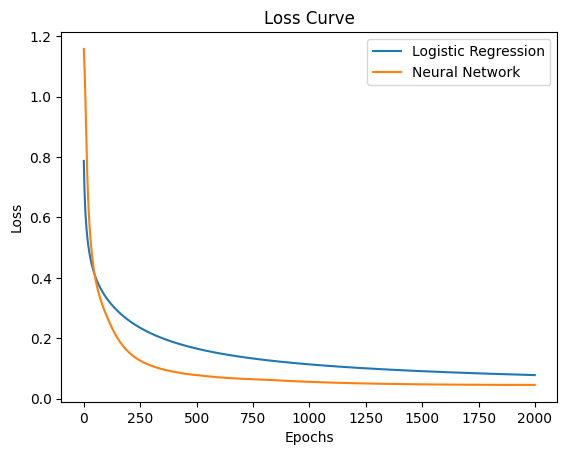

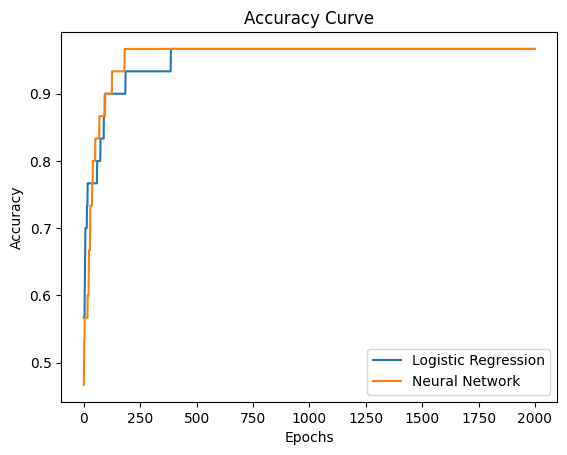

In [26]:
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_std).float()
y_train_tensor = torch.tensor(y_train).long()
X_test_tensor = torch.tensor(X_test_std).float()
y_test_tensor = torch.tensor(y_test).long()

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=8)

# Define logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        x = self.linear(x)
        return x

# Define neural network model
class NeuralNetworkModel(nn.Module):
    def __init__(self):
        super(NeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(4, 5)
        self.fc2 = nn.Linear(5, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define training function
def train(model, criterion, optimizer, num_epochs=2000):
    loss_history = []
    accuracy_history = []
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute loss and accuracy on test data
        with torch.no_grad():
            y_pred_test = model(X_test_tensor)
            loss_test = criterion(y_pred_test, y_test_tensor)
            accuracy_test = (y_pred_test.argmax(dim=1) == y_test_tensor).float().mean()
            loss_history.append(loss_test.item())
            accuracy_history.append(accuracy_test.item())

    return loss_history, accuracy_history

# Train logistic regression model
lr_model = LogisticRegressionModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)
lr_loss_history, lr_accuracy_history = train(lr_model, criterion, optimizer)

# Train neural network model
nn_model = NeuralNetworkModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)
nn_loss_history, nn_accuracy_history = train(nn_model, criterion, optimizer)

# Plot loss and accuracy curves
plt.plot(lr_loss_history, label='Logistic Regression')
plt.plot(nn_loss_history, label='Neural Network')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(lr_accuracy_history, label='Logistic Regression')
plt.plot(nn_accuracy_history, label='Neural Network')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
